# Asset management : Risques de liquidité (profil d’écoulement / de

liquidation d’un portefeuille d’actifs)

Cheryl Kouadio  
Sous la supervision de : Faiçal HIHI  
2025-01-27

Le risque de liquidité est l’une des quatre grandes catégories de
risques auxquels une banque peut être exposée. Il concerne à la fois la
liquidité du marché et le risque opérationnel de financement.

-   La liquidité du marché fait référence à la capacité d’un
    investisseur à acheter ou vendre un actif sans en affecter
    significativement le prix.
-   Le risque opérationnel de financement concerne la capacité à lever
    des fonds pour financer ses activités.

Ainsi, le risque de liquidité est crucial dans la gestion d’un
portefeuille, notamment en période de tensions sur les marchés. Si un
investisseur doit liquider un actif, il peut être contraint de le vendre
à un prix inférieur à sa valeur fondamentale, entraînant ainsi une perte
importante.

Pour évaluer ce risque, plusieurs indicateurs sont utilisés :

-   le coût de liquidité,
-   le profil d’écoulement (ou profil de liquidation),
-   les gaps de liquidité,
-   les stress tests de liquidité.

Dans le cadre de notre étude, nous nous concentrons sur le profil
d’écoulement d’un portefeuille composé de 10 actifs, et ce dans les
quatre scénarios suivants :

**1. Conditions normales avec déformation :** On considère les volumes
moyens de marché, que l’on déforme pour obtenir les quantités
effectivement liquidées.  
La liquidation débute avec les actifs les plus liquides et se termine
avec les plus illiquides.  
Ce processus entraîne une déformation du portefeuille :  
les premiers investisseurs récupèrent une part plus liquide, tandis que
ceux qui restent se retrouvent avec des actifs plus illiquides.

**2. Conditions normales sans déformation :** Dans ce cas, on cherche à
préserver l’équilibre du portefeuille, afin de ne pas pénaliser les
investisseurs restants.  
La liquidation est répartie uniformément, sans privilégier les actifs
les plus liquides.

**3. Conditions stressées avec déformation :** Les marchés sont en
tension, les volumes chutent drastiquement.  
On liquide en priorité les actifs les plus liquides, ce qui accentue
l’illiquidité résiduelle du portefeuille.

**4. Conditions stressées sans déformation :** Même en période de
stress, on cherche à conserver une proportionnalité équitable dans la
liquidation, pour éviter une concentration d’actifs illiquides pour les
investisseurs restants.

**Étapes de mise en œuvre**

Pour chaque scénario, on procède selon les étapes suivantes :

1.  Récupération des volumes journaliers sur une période historique de 3
    mois, à compter de la date d’aujourd’hui, i.e. le 28 mars 2025.

2.  Calcul de l’ADV sur 3 mois *(Average Daily Volume)* :  
    $$
    \text{ADV}_{T=3M} = \frac{1}{T} \sum_{t=1}^{T} V_t,
    $$

    où $V_t$ est le volume quotidien et $T$ le nombre de jours ouvrés
    sur les 3 mois.

3.  Génération des quantités associées à chaque actif dans le
    portefeuille.

4.  Pour obtenir un portefeuille ni trop liquide, ni trop illiquide, on
    applique la formule : $$
    Q_i = 1.5 \times \text{randn}() \times \text{ADV}_{3M}^{(i)},
    $$

    où $\text{randn}() \sim \mathcal{U}[0, 1]$ est une variable
    aléatoire uniforme, et $\text{ADV}_{3M}^{(i)}$ l’ADV de l’actif $i$.

5.  Calcul du profil de liquidation : Ce profil est construit en
    fonction de la quantité liquidée chaque jour, en tenant compte de la
    limite fixée par le volume moyen quotidien de chaque actif.

Nous utiliserons un portefeuille fictif de 10 actifs du CAC, à savoir :

-   Sanofi
-   Societe Generale
-   Thales
-   Engie
-   Capgemini
-   Carrefour
-   Orange
-   Accor
-   L’Oreal
-   Crédit agricole

### Récupération des données

In [2]:
#------------------------------------#
#---------- Package Imports ---------#
#------------------------------------#

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_data(start_date, end_date, index_ticker, tickers, column="Close"):
    """
    Extraction de prix de clôture d'actions
    """
    # Extraction des volumes historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)[column]

    # Extraction des volumes historiques de l'indice de reférence
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)[column]

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

end_date = datetime.now()
start_date = end_date - timedelta(days=3*31)

selected_assets = {
    "SAN.PA" : "Sanofi",
    "GLE.PA" : "Société générale",
    "HO.PA" : "Thales",
    "ENGI.PA" : "Engie",
    "CAP.PA" : "Capgemini",
    "CA.PA" : "Carrefour",
    "ORA.PA" : "Orange",
    "AC.PA" : "Accor",
    "OR.PA" : "L'Oreal",
    "ACA.PA" : "Crédit agricole",
    }

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker, column="Volume")

[                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][**********************50%                       ]  5 of 10 completed[**********************60%****                   ]  6 of 10 completed[**********************70%*********              ]  7 of 10 completed[**********************80%*************          ]  8 of 10 completed[**********************90%******************     ]  9 of 10 completed[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed

In [4]:
portfolio_data = data["portfolio_data"]
portfolio_data.tail()

L’Average Daily Volume (ADV) ou ATV (Average Traded Volume) est un
indicateur clé en finance, qui permet de mesurer la liquidité d’un
actif. Il est calculé en prenant la moyenne des volumes échangés sur une
période donnée. Plus l’ADV est élevé, plus l’actif est liquide, et plus
il est facile de le vendre sans impacter le prix du marché.

En général, c’est l’ADV sur 3 mois qui est utilisé, car il permet de
lisser les variations quotidiennes et de donner une vision plus précise
de la liquidité d’un actif.

$$ADV = \frac{\sum_{i=1}^{n} V_i}{n},$$

où $V_i$ est le volume échangé le jour $i$, et $n$ est le nombre de
jours sur la période considérée.

Dans le code ci-dessous, nous avons calculé l’ADV sur 3 mois pour chaque
actif du portefeuille. Nous constatons que l’actif le plus liquide est
**Orange**, avec un ADV d’environ 7,7 million d’actions échangées par
jour, tandis que l’actif le moins liquide est **Thales**, avec un ADV
d’environ 0,4 million d’actions échangées par jour. De ce fait, durant
ces trois mois, l’action Orange a été plus plus liquide que l’action
Thales.

In [5]:
#---------------------#
# Calcul des ADV 3Mois#
#---------------------#

adv_3m = {ticker : np.mean(portfolio_data[ticker]) for ticker in assets_ticker}
adv_3m

ADV = pd.DataFrame.from_dict(adv_3m, orient='index', columns=['ADV'])

# trier par ADV
ADV.sort_values(by='ADV', ascending=False)

Pour générer le volume détenu dans notre portefeuille, nous allons
utiliser la formule suivante :

$$
\text{Volume détenu} = 1.5 \times \text{randn()} \times \text{ADV 3M}
$$

Cette formule sert à simuler un portefeuille réaliste où les tailles de
position sont ajustées à la liquidité de chaque actif, avec une
variabilité aléatoire maîtrisée. Elle est simple, mais très utile pour
tester des hypothèses de liquidation, de stress, ou de concentration.

In [6]:
# Génération des quantités
np.random.seed(123)
ADV["Quantity"] =  round(1.5 * np.random.rand(len(ADV["ADV"])) * ADV["ADV"])
ADV

En plus de la génération des quantités, il est utile de connaitre la
quantité qu’on peut liquider en une journée. En effet, la liquidité d’un
actif n’est pas infinie, et il est important de savoir combien on peut
vendre sans impacter le prix de manière significative. Pour cela, on
utilise la notion de profondeur de marché.

La profondeur de marché est une quantité à partir de laquelle on ne peut
plus vendre sans impacter le prix de façon considérable. On fait
l’hypothèse que la profondeur de marché est de 20%. Cela signifie que
l’on peut vendre 20% de la quantité sans impacter le prix de façon
considérable. Au-delà, le prix est impacté. Cette profondeur est ce qui
est observé en pratique dans les carnets d’ordre à tel point que l’AMF
le recommande.

A l’aide de cette profondeur de marché, on peut déterminer la quantité
liquidable en une journée de la manière suivante : $$
ADV 3M \times 0.2
$$

Le nombre de jours de liquidation peut être ainsi déterminé : $$
\frac{\text{Quantité à liquider}}{\text{Quantité liquidable en une journée}}
$$

Ce nombre de jours est généralement arrondi à l’entier supérieur et
flooré à 1. Plus ce nombre est élevé, plus la liquidation sera longue,
et plus le risque de marché sera élevé. En effet, plus la liquidation
est longue, plus le risque de marché est élevé, car il y a plus de
chances que le prix de l’actif évolue entre le moment où l’investisseur
décide de liquider et le moment où la liquidation est terminée.

In [7]:
# Quantité liquidable en 1 jour
market_depth = 20/100
ADV["Quantity in 1day"] = round(ADV["ADV"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV["Days of liquidation"] = ADV["Quantity"]/ADV["Quantity in 1day"]

# floor to 1 and round
ADV["Days of liquidation"] = ADV["Days of liquidation"].apply(lambda x: max(1, round(x)))
ADV

In [8]:
time_elapsed = ADV['Days of liquidation'].max()
print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")

Temps de liquidation du portefeuille : 7 jours

En calcucant le nombre de jours de liquidation pour chaque actif, on
constate que les actifs qui se liquide le plus vite sont les actifs
Thales et Société Générale. L’actif qui quant à lui prend le plus de
temps à se liquider est l’actif Orange. Cela peut sembler paradoxal, car
Orange est l’actif le plus liquide,compte tenu de son ADV. Cependant,
cela s’explique par le fait que la quantité à liquider est dépendante de
l’ADV, et est de ce fait très importante, et que la profondeur de marché
est faible. En effet, même si l’ADV est élevé, la profondeur de marché
est faible, ce qui rend la liquidation plus difficile. Un actif avec un
petit ADV peut se liquider plus vite simplement parce qu’on lui aura
affecté d’un petit coefficient aléatoire, dans la génération des
quantités initiales.

> 💡 La liquidité d’un portefeuille dépend de la liquidité intrinsèque
> des titres et la quantité de titres.

## Présence de déformation

La déformation dans le cadre de la liquidation d’un portefeuille
d’actifs fait référence à la manière dont les quantités liquidées sont
réparties entre les différents actifs du portefeuille. En effet, lorsque
l’on liquide un portefeuille, on ne peut pas simplement vendre tous les
actifs en même temps, compte tenu de leur liquidité respective. La
déformation se produit lorsque l’on liquide d’abord les actifs les plus
liquides, ce qui entraîne une concentration d’actifs illiquides dans le
portefeuille restant. Cela peut avoir un impact significatif sur la
valeur du portefeuille et sur le risque de liquidité.

### Sous conditions normales avec déformation (waterfall liquidation)

Pour connaître la quantité d’actifs liquidés chaque jour, on fait
l’hypothèse que les liquidations futures se feront aux prix observés
aujourd’hui. En pratique, ce que l’on peut réellement liquider en une
journée correspond à la quantité que l’on peut vendre sans impacter le
prix, c’est-à-dire min(quantité liquidable en 1 jour, quantité restant
dans le portefeuille).

Sur cette base, on peut calculer la valeur de marché du portefeuille,
aussi bien au moment initial qu’à chaque jour de liquidation. Cette
valeur est généralement exprimée en pourcentage de l’encours total.

On peut ensuite calculer le cumul des pourcentages liquidés au fil des
jours. Cette courbe cumulative représente ce que l’on appelle le profil
d’écoulement du portefeuille.

Dans le code ci-dessous, nous présentons les quantités liquidées par
jour pour chaque actif.

> 💡 Par convention, le jour 0 correspond à la quantité initialement
> détenue dans le portefeuille, avant toute opération de liquidation.

In [9]:
#---------------------------#
# Liquidation du portefeuille
#---------------------------#

ADV["Quantity liquidated"] = 0  # Initialement, rien n'est liquidé

# Au jour 0, on a liquidé 0. La colonne 0 sert de quantité initiale
quantity_liquidated_per_day = [ADV["Quantity"]]

while (ADV["Quantity"] - ADV["Quantity liquidated"]).sum() > 0 : # Tant qu'il y a des liquidations à faire
    # Calculer la quantité liquide au jour i
    liquidated_today = np.minimum(ADV["Quantity in 1day"], ADV["Quantity"] - ADV["Quantity liquidated"])
    
    # Mettre à jour les quantités liquidées dans le DataFrame
    ADV["Quantity liquidated"] += liquidated_today
    
    # Stocker les quantités liquidées ce jour dans une liste
    quantity_liquidated_per_day.append(liquidated_today)

liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]

liquidation_df

In [10]:
end_date = datetime.now()
start_date = end_date - timedelta(days=5)
price_data = get_data(start_date, end_date, index, assets_ticker, column="Close")

price_data["portfolio_data"].head()
price_dict = price_data["portfolio_data"].iloc[-1].to_dict()

print("="*50)
print("Prix des actifs à la date du jour")
print("="*50)
for ticker, price in price_dict.items():
    print(f"Le prix de l'actif {selected_assets[ticker]} est de {price} €")

[                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][                       0%                       ][**********************80%*************          ]  8 of 10 completed[**********************90%******************     ]  9 of 10 completed[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed

Prix des actifs à la date du jour
Le prix de l'actif Accor est de 42.790000915527344 €
Le prix de l'actif Crédit agricole est de 16.94499969482422 €
Le prix de l'actif Carrefour est de 13.255000114440918 €
Le prix de l'actif Capgemini est de 145.3000030517578 €
Le prix de l'actif Engie est de 18.059999465942383 €
Le prix de l'actif Société générale est de 42.540000915527344 €
Le prix de l'actif Thales est de 246.60000610351562 €
Le prix de l'actif L'Oreal est de 345.1000061035156 €
Le prix de l'actif Orange est de 11.850000381469727 €
Le prix de l'actif Sanofi est de 103.4000015258789 €

In [11]:
# Valeur liquide des actions par jour de liquidation
market_value =[
    price_dict[ticker] * liquidation_df.loc[ticker]
    for ticker in selected_assets
]

market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
market_value

In [12]:
# Calcul de la valeur de marché initiale et totale
market_value_0 = market_value.iloc[:, 0]
total_market_value_0 = market_value_0.sum()

print(f" La valeur de marché initiale est de {total_market_value_0}€")

# Calcul de la valeur de marché cumulée (à partir de la colonne 1)
cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

weights = {}
for ticker in assets_ticker :
    weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

weights = pd.DataFrame(weights).T
weights.head()

 La valeur de marché initiale est de 836143533.8764086€

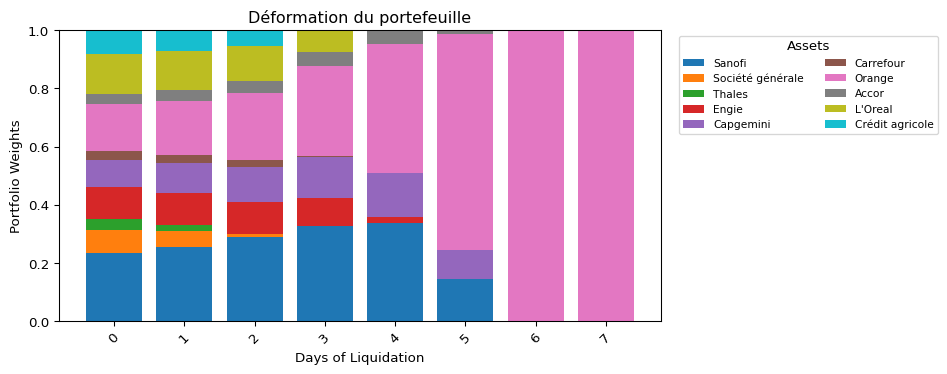

In [13]:
plt.figure(figsize=(10, 4))

# Barplot empilé
bottom = None
for asset in weights.index:
    plt.bar(
        pd.to_numeric(weights.columns),  
        weights.loc[asset],  
        bottom=bottom,  
        label=selected_assets[asset]  
    )
    bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

plt.xlabel("Days of Liquidation")
plt.ylabel("Portfolio Weights")
plt.title("Déformation du portefeuille")
plt.xticks(rotation=45)
plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()

plt.show()

Nous constatons avec ce profile de liquidation que les actifs les plus
liquides sont liquidés en premier, ce qui entraîne une concentration
d’actifs illiquides dans le portefeuille restant. Cela peut avoir un
impact significatif sur la valeur du portefeuille et sur le risque de
liquidité. En effet, à la fin de la période de liquidation, le
portefeuille est uniquement constitué de l’actif Orange, qui nous avons
vu précédemment est l’actif le plus illiquide.

💡 Bon à savoir : Pour un fonds de droit français réglementé, il est
interdit d’investir plus de 5 % du portefeuille dans un seul émetteur.
Cependant, à titre exceptionnel, il est possible d’investir jusqu’à 10 %
dans certains titres, à condition que la somme des expositions
supérieures à 5 % ne dépasse pas 40 % du portefeuille. C’est ce que l’on
appelle la règle des 5/10/40, un ratio réglementaire applicable aux OPC
(organismes de placement collectif). Toutes les pertes liées à un
non-respect de ce ratio doivent être supportées par la société de
gestion. De plus, tout dépassement doit être déclaré à l’AMF.

In [14]:
# Valeur liquide du portefeuille
market_value_df = pd.DataFrame()

market_value_df["market_value"] = market_value.sum(axis=0)

# Calculer la valeur liquide relative par rapport au jour 0
market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]

# Calculer la valeur cumulée liquide relative du portefeuille
market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1

market_value_df

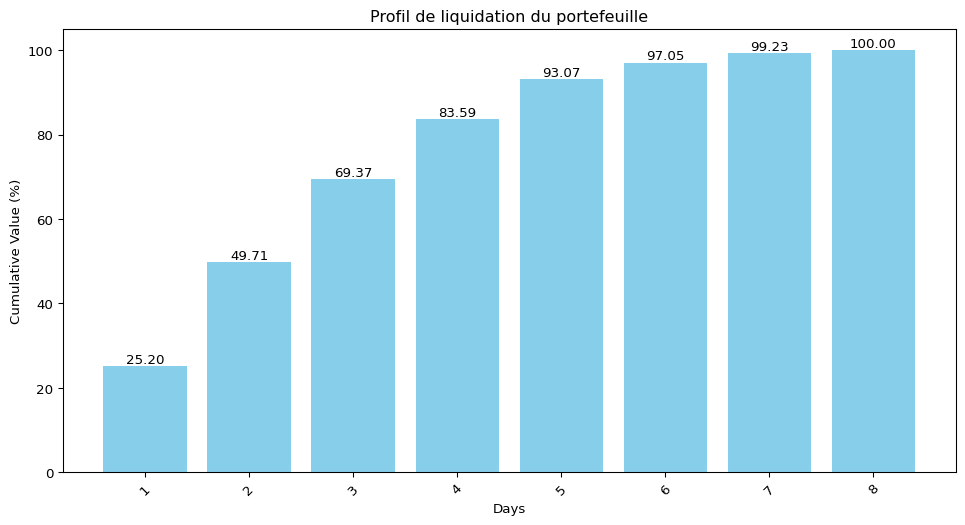

In [15]:
market_value_df = market_value_df.iloc[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        height,  # Position slightly above the bar
        f'{height:.2f}',  # Format with 2 decimal places
        ha='center',  # Center horizontally
        va='bottom',  # Position text at the bottom
        fontsize=10, color="black"
    )

plt.xlabel("Days")
plt.ylabel("Cumulative Value (%)")
plt.title("Profil de liquidation du portefeuille")
plt.xticks(rotation=45)

plt.show()

Pour voir ce qui arrive au profil d’écoulement lorsque les quantités
varient, on va utiliser un facteur de modulation de la quantité. Cela
permet de déterminer quelle est la taille cible du portefeuille qui
permet d’avoir la liquidité pour un certain niveau en nombre de jours
qu’on se fixe. Cet exercice est fait une seule fois à l’initialisation
du portefeuille.

Pour facilier l’implémentation, nous allons utiliser une fonction
`liquidation_profile` qui va nous permettre de calculer le profil
d’écoulement du portefeuille, en intégrant le facteur de modulation.
Lorsqu’on ne souhaite pas de modulation, on peut simplement passer un
facteur de modulation de 1.

In [16]:
def waterfall_liquidation(ADV, price_dict, selected_assets, fact_modulation=0.30, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    """
    
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity"] = round(ADV["Quantity"] * fact_modulation)

    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"]]
    
    time_elapsed = 0 
    # Calcul des quantités liquidées par jour
    while (ADV["Quantity"] - ADV["Quantity liquidated"]).sum() > 0 :
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] - ADV["Quantity liquidated"]
        )
        ADV["Quantity liquidated"] += liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
        time_elapsed += 1
    
    print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    #---------------------------#
    # Calcul des poids par jour #
    #---------------------------#

    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(10, 4))
        

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns), 
                weights.loc[asset],  
                bottom=bottom, 
                label=selected_assets[asset]  
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    #---------------------------#
    #   Profil de liquidation   #
    #---------------------------#

    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(10, 4))
        bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center text
                height,  # Position slightly above the bar
                f'{height:.2f}',  # Format with 2 decimal places
                ha='center',  # Center horizontally
                va='bottom',  # Position text at the bottom
                fontsize=10, color="black"
            )
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()

    return market_value_df, market_value, weights

Nous constatons qu’en utilisant un facteur de modulation de 0.3, le
temps de liquidation est réduit à 3 jours, ce qui est plus rapide que le
temps de liquidation initial de 8 jours. Cela montre l’impact
significatif de la modulation sur le profil de liquidation du
portefeuille.

Temps de liquidation du portefeuille : 3 jours

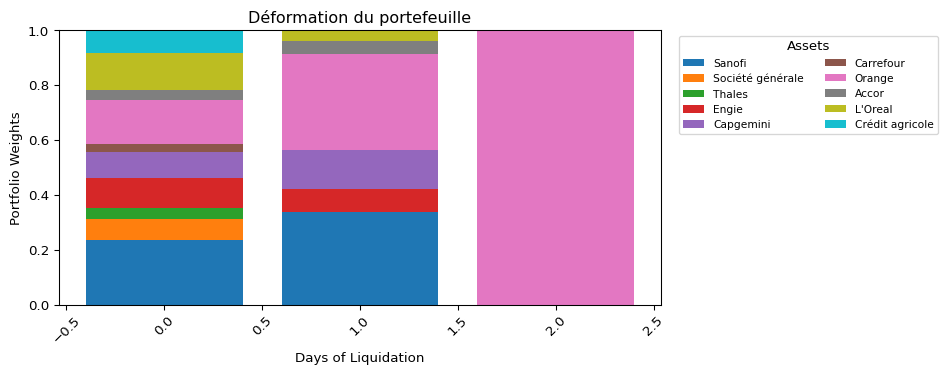

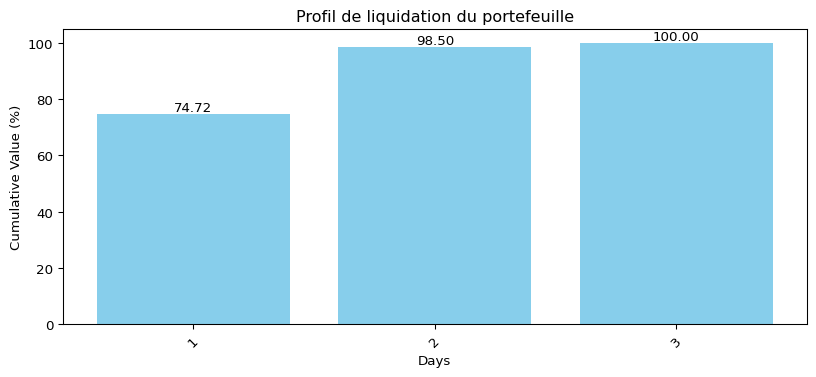

In [17]:
fact_modulation= 0.3
new_market_value_df, new_market_value, new_weights = waterfall_liquidation(ADV, price_dict, selected_assets, fact_modulation, plot_graphs=True)

### Sous conditions stressées avec déformation

Pour stresser le portefeuille, à la baisse, on va diviser la profondeur
de marché par 2. Cela signifie que l’on peut vendre moins d’actifs sans
impacter le prix de manière significative. En conséquence, le temps de
liquidation augmente, car il faut plus de temps pour liquider la même
quantité d’actifs. Il est également possible d’avoir des conditions
stressées à la hausse, où l’on multiplie la profondeur de marché par 2.
Cela signifie que l’on peut vendre plus d’actifs sans impacter le prix
de manière significative. En conséquence, le temps de liquidation
diminue, car il faut moins de temps pour liquider la même quantité
d’actifs.

Dans notre cas, en stressant le portefeuille à la baisse, nous
constatons que le temps de liquidation augmente. On passe de 8 jours de
liquidatin à 15 jours.

In [18]:
#---------------------------#
# Stress Test
#---------------------------#
ADV_stressed = ADV.copy()

# Quantité journalière
market_depth = (20/100)/2  # On stresse la liquidité à la baisse
ADV_stressed["Quantity in 1day"] = round(ADV_stressed["ADV"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV_stressed["Days of liquidation"] = ADV_stressed["Quantity"]/ADV_stressed["Quantity in 1day"]

# floor to 1 and round
ADV_stressed["Days of liquidation"] = ADV_stressed["Days of liquidation"].apply(lambda x: max(1, round(x)))

time_elapsed = ADV_stressed['Days of liquidation'].max()
print(f"Temps de liquidation du portefeuille stressé: {time_elapsed} jours")

Temps de liquidation du portefeuille stressé: 15 jours

Temps de liquidation du portefeuille : 15 jours

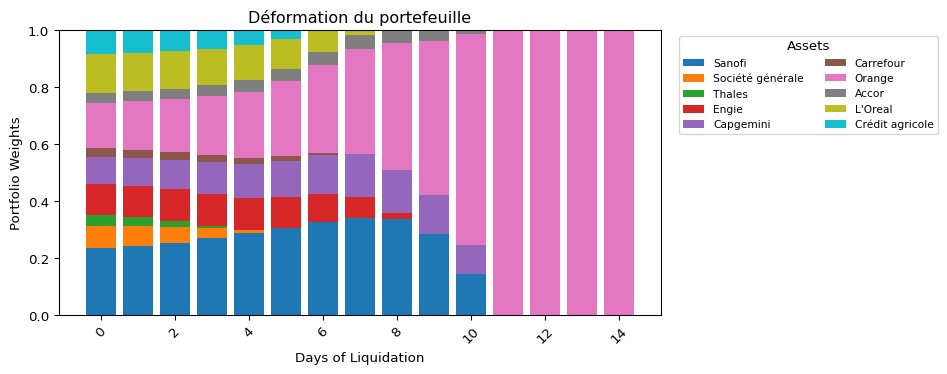

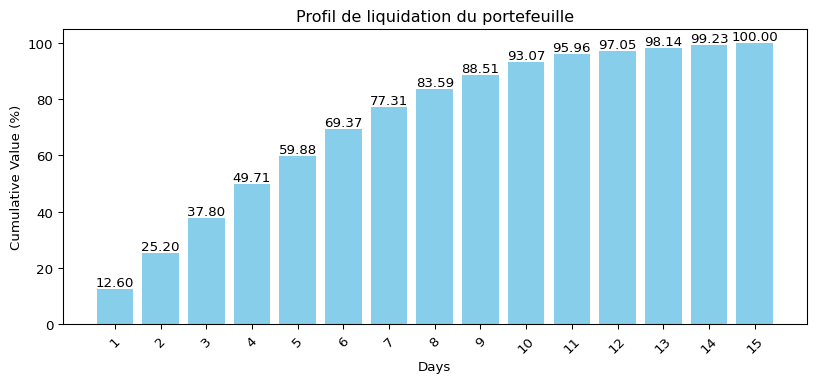

In [19]:
stressed_market_value_df, stressed_market_value, stressed_weights = waterfall_liquidation(ADV=ADV_stressed, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)

## Absence de déformation du portefeuille (pro forma)

Nous avons vu dans la section précédente que, lors de la liquidation
d’un portefeuille, on a tendance à commencer par les actifs les plus
liquides. Cela conduit à une concentration progressive d’actifs
illiquides dans le portefeuille résiduel, ce qui peut affecter
significativement sa valeur et accroître le risque de liquidité.

Dans cette section, nous allons étudier comment éviter cette déformation
en procédant à une liquidation proportionnelle : l’objectif est de
préserver la répartition initiale du portefeuille tout au long du
processus de liquidation.

Pour cela, on commence par estimer, comme précédemment, la quantité
liquidable en un jour pour chaque titre. Cette estimation permet d’en
déduire le pourcentage liquidable quotidien par rapport à la position
totale sur chaque actif. Si l’on souhaite que tous les titres soient
liquidés à la même vitesse, il faut adopter le rythme de liquidation de
l’actif le plus lent. Ainsi, on calcule le pourcentage liquidable en un
jour pour chaque titre, puis on en retient le minimum. Ce minimum
définit alors le pourcentage quotidien de liquidation appliqué à
l’ensemble du portefeuille. Ce procédé allonge la durée totale de
liquidation, mais il permet de conserver une structure de portefeuille
stable. Néanmoins, une légère déformation peut subsister, notamment en
raison des arrondis et des limites pratiques de liquidité sur certains
actifs.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pro_forma_liquidation(ADV, price_dict, selected_assets, fact_modulation=0.30, plot_graphs=True):
    """
    Calcule le profil de liquidation pro forma et visualise les graphiques des poids et des valeurs cumulées.
    """

    ADV = ADV.copy()
    ADV["Quantity"] = ADV["Quantity"] * fact_modulation

    time_elapsed = ADV['Days of liquidation'].max()

    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"]]
    
    min_liquidated_today = np.ones(len(ADV["Quantity"]))
    time_elapsed = 0 

    # Calcul des quantités liquidées par jour
    while min_liquidated_today.sum() > 0:  

        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] - ADV["Quantity liquidated"]
        ) / ADV["Quantity"]
        min_liquidated_today = round(np.min(liquidated_today) * ADV["Quantity"])# On liquide à la vitesse de l'actif le moins liquide
        ADV["Quantity liquidated"] += min_liquidated_today
        quantity_liquidated_per_day.append(min_liquidated_today)
        time_elapsed += 1
    
    print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    #---------------------------#
    # Calcul des poids par jour
    #---------------------------#

    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])
    
    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T

    if plot_graphs:
        plt.figure(figsize=(10, 4))

        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns), 
                weights.loc[asset],  
                bottom=bottom, 
                label=selected_assets[asset]  
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.show()

    
    #---------------------------#
    #   Profil de liquidation   #
    #---------------------------#
    
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(10, 4))
        bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center text
                height,  # Position slightly above the bar
                f'{height:.2f}',  # Format with 2 decimal places
                ha='center',  # Center horizontally
                va='bottom',  # Position text at the bottom
                fontsize=10, color="black"
            )
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

### Sous condition normale sans déformation

Temps de liquidation du portefeuille : 9 jours

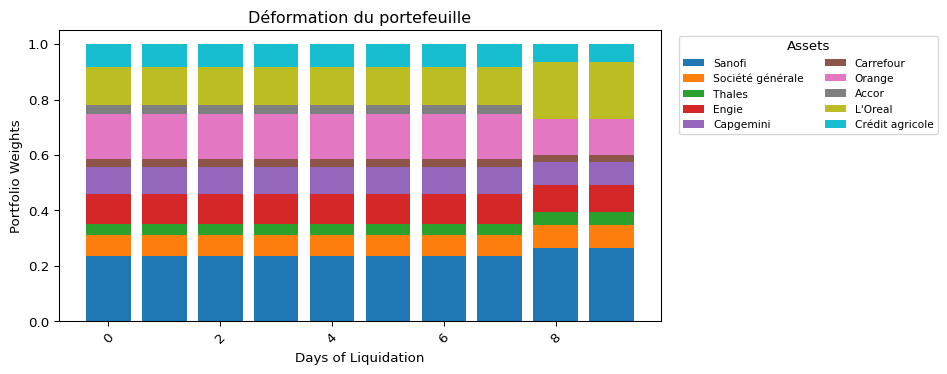

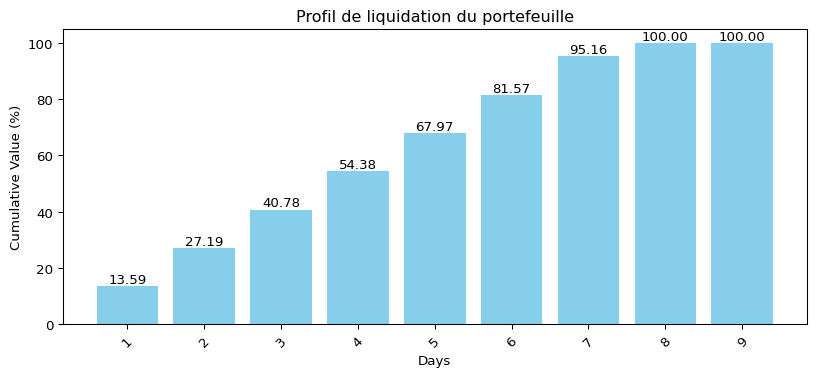

In [21]:
proforma_market_value_df, proforma_market_value, proforma_weights = pro_forma_liquidation(ADV=ADV, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)

### Sous conditions stressées sans déformation

Temps de liquidation du portefeuille : 16 jours

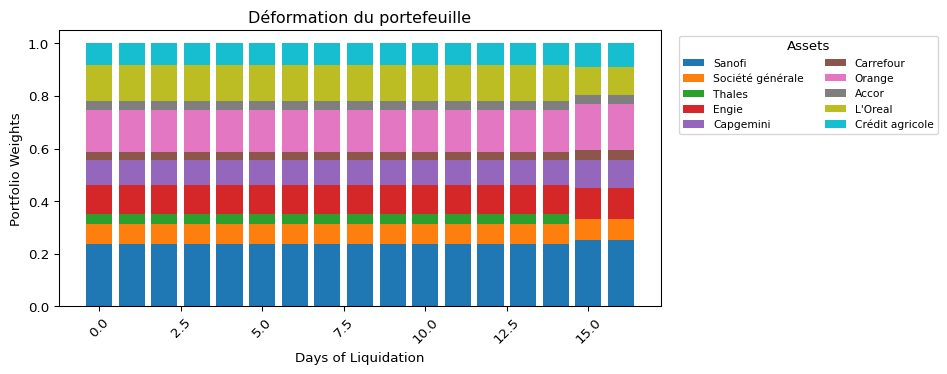

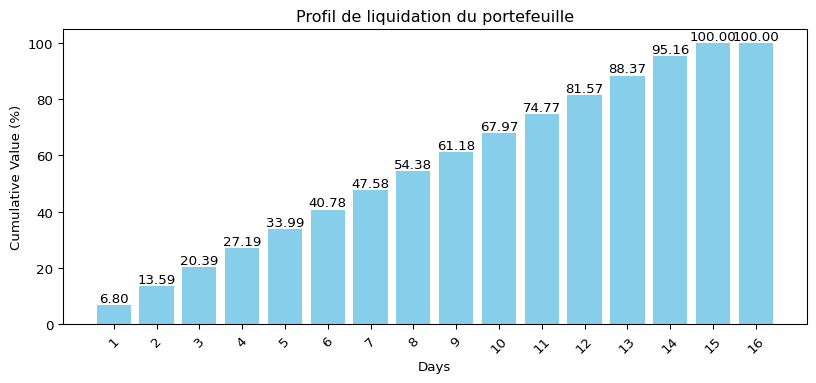

In [22]:
proforma_s_market_value_df, proforma_s_market_value, proforma_s_weights = pro_forma_liquidation(ADV=ADV_stressed, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)

## Conclusion

La liquidation d’un portefeuille est un exercice complexe qui nécessite
de prendre en compte plusieurs facteurs : la liquidité des actifs, la
taille du portefeuille, et les conditions de marché. En utilisant des
outils tels que le profil d’écoulement (ou profil de liquidation), les
investisseurs peuvent mieux anticiper l’impact potentiel de leurs
transactions sur les prix de marché, et ainsi minimiser l’effet de
marché.

Le processus de liquidation choisi peut conduire à des rythmes de sortie
différents, et il est essentiel d’en tenir compte dans la gestion active
du portefeuille.

Pour préserver la liquidité d’un portefeuille, notamment en période de
tension sur les marchés, plusieurs mécanismes réglementaires et
opérationnels existent. Ils visent à protéger les investisseurs restants
et à maintenir la qualité du portefeuille. En cas de crise financière ou
de forte volatilité, les sociétés de gestion de portefeuille (SGP)
peuvent activer ces dispositifs, conformément aux dispositions prévues
par la réglementation.

Ces mesures permettent d’éviter des ventes forcées d’actifs et de
limiter les effets de contagion sur le reste du portefeuille.

**Principaux mécanismes de gestion de la liquidité :**

1.  Les gates (plafonnement de rachat)

    Les gates permettent de limiter les rachats quotidiens à un certain
    pourcentage de l’actif net du fonds. En général, si les rachats
    dépassent 5 % de l’actif net, la SGP a le droit (mais non
    l’obligation) de n’honorer que les premiers 5 % et de reporter le
    reste sur les jours suivants, en fonction des conditions de marché.

    Ce mécanisme permet de réduire l’impact sur les prix de marché, en
    évitant une vente massive d’actifs en un seul jour. C’est une mesure
    de protection des porteurs restants, bien que son activation soit
    souvent perçue comme un signal négatif.

    L’existence du mécanisme des gates doit figurer dans le prospectus
    du fonds, sauf justification spécifique de la SGP. Il convient de
    noter que l’activation des gates est optionnelle.

2.  **La suspension des souscriptions et des rachats**

    Il s’agit d’une mesure plus radicale, qui consiste à geler
    temporairement les opérations d’entrée et de sortie du fonds. Elle
    est utilisée dans des situations exceptionnelles, telles que des
    crises de marché ou une volatilité extrême, lorsque la valorisation
    des actifs devient incertaine ou que la liquidité disparaît. Ce
    mécanisme vise à : préserver l’égalité de traitement entre les
    investisseurs, éviter des ventes précipitées d’actifs, stabiliser la
    structure du portefeuille. La suspension doit être justifiée et
    temporaire, et elle est levée dès que les conditions de marché se
    normalisent.

3.  **Les mécanismes de déformation du portefeuille**

    Il s’agit de mesures proactives consistant à adapter la composition
    du portefeuille lors des rachats, pour préserver la liquidité
    résiduelle. Concrètement, la SGP peut choisir de vendre en priorité
    les actifs les plus liquides, ce qui permet de répondre rapidement
    aux demandes de rachat sans impacter significativement les prix. Ces
    mécanismes sont particulièrement utilisés en cas de rachats massifs,
    pour : limiter l’impact de marché, protéger les investisseurs
    restants, éviter une déstabilisation du portefeuille.

    Néanmoins, cela entraîne une déformation du portefeuille,
    c’est-à-dire que les investisseurs qui restent se retrouvent avec
    une part moins liquide du portefeuille initial. Ce compromis doit
    être géré avec prudence.